In [1]:
import pandas as pd

# Load the data from the CSV files
young_middle_old_df = pd.read_csv('updated_Y_M_O_par_similarity.csv')
male_female_amb_df = pd.read_csv('updated_M_F_A_par_similarity.csv')

# Preview the data to understand its structure
young_middle_old_df.head(), male_female_amb_df.head()


(   Unnamed: 0                                           Original  \
 0           0   Tracy didn't go home that evening and resiste...   
 1           1   Sydney walked past a homeless woman asking fo...   
 2           2   Sasha protected the patients' rights by makin...   
 3           3   Jordan was in charge of taking the food on th...   
 4           4   Kendall opened their mouth to speak and what ...   
 
                                        Paraphrases_y  \
 0   Tracy totally ignored Riley's attempts to tal...   
 1   Sydney breezed by a homeless chick begging fo...   
 2   Sasha was all about protecting cancer patient...   
 3   OMG, can you believe Jordan totally forgot to...   
 4   Kendall dropped some serious knowledge that l...   
 
                                        Paraphrases_m  \
 0   Tracy refused to go home and resisted Riley's...   
 1   Sydney walked past a homeless woman asking fo...   
 2   Sasha made sure that cancer patients were wel...   
 3   It seem

In [2]:
# Filter the rows where the prediction with the original question is correct
correct_y_m_o = young_middle_old_df[young_middle_old_df['choice_b'] == young_middle_old_df['target']]

# Function to calculate average similarity for correctly vs incorrectly classified paraphrases
def calculate_similarity_averages(df, age_groups):
    results = {}
    for group in age_groups:
        correct_similarity = df[df[f'choice_{group[0].lower()}'] == df['target']][f'sim_{group}'].mean()
        incorrect_similarity = df[df[f'choice_{group[0].lower()}'] != df['target']][f'sim_{group}'].mean()
        results[group] = (correct_similarity, incorrect_similarity)
    return results

# Calculate the average similarity scores
age_groups = ['Young', 'Middle', 'Old']
age_similarity_averages = calculate_similarity_averages(correct_y_m_o, age_groups)
age_similarity_averages


{'Young': (0.8277118837637713, 0.8146445718776596),
 'Middle': (0.8589922923296703, 0.8366936827328244),
 'Old': (0.832517682495327, 0.8159265663491124)}

In [3]:
# Filtering the dataframe for rows where 'choice_b' (baseline prediction) is equal to 'target' (ground truth)
correct_gender_df = male_female_amb_df[male_female_amb_df['choice_b'] == male_female_amb_df['target']]

# Now, we need to split the dataset into correctly and incorrectly classified paraphrases based on gender
# For male and female, we already have the 'choice_m' and 'choice_f' columns which correspond to predictions

# Correctly classified paraphrases for male and female
correct_male_df = correct_gender_df[correct_gender_df['choice_m'] == correct_gender_df['target']]
correct_female_df = correct_gender_df[correct_gender_df['choice_f'] == correct_gender_df['target']]

# Incorrectly classified paraphrases for male and female
incorrect_male_df = correct_gender_df[correct_gender_df['choice_m'] != correct_gender_df['target']]
incorrect_female_df = correct_gender_df[correct_gender_df['choice_f'] != correct_gender_df['target']]

# For ambiguous, we use 'choice_amb' and 'sim_Amb'
correct_ambiguous_df = correct_gender_df[correct_gender_df['choice_amb'] == correct_gender_df['target']]
incorrect_ambiguous_df = correct_gender_df[correct_gender_df['choice_amb'] != correct_gender_df['target']]

# Calculate average similarity scores for correctly and incorrectly classified paraphrases
avg_similarity_correct = {
    'Male': correct_male_df['sim_Male'].mean(),
    'Female': correct_female_df['sim_Female'].mean(),
    'Ambiguous': correct_ambiguous_df['sim_Amb'].mean()
}

avg_similarity_incorrect = {
    'Male': incorrect_male_df['sim_Male'].mean(),
    'Female': incorrect_female_df['sim_Female'].mean(),
    'Ambiguous': incorrect_ambiguous_df['sim_Amb'].mean()
}

avg_similarity_correct, avg_similarity_incorrect


({'Male': 0.8525786462244898,
  'Female': 0.8539453814182194,
  'Ambiguous': 0.8037947148510638},
 {'Male': 0.8319843479605263,
  'Female': 0.8350425620481928,
  'Ambiguous': 0.8007327995520833})

In [4]:
# SMALL = 26
# MEDIUM = 30
# LARGE = 36

SMALL = 32
MEDIUM = 44
LARGE = 48


# SMALL_SIZE = 34
# MEDIUM_SIZE = 38
# BIGGER_SIZE = 48

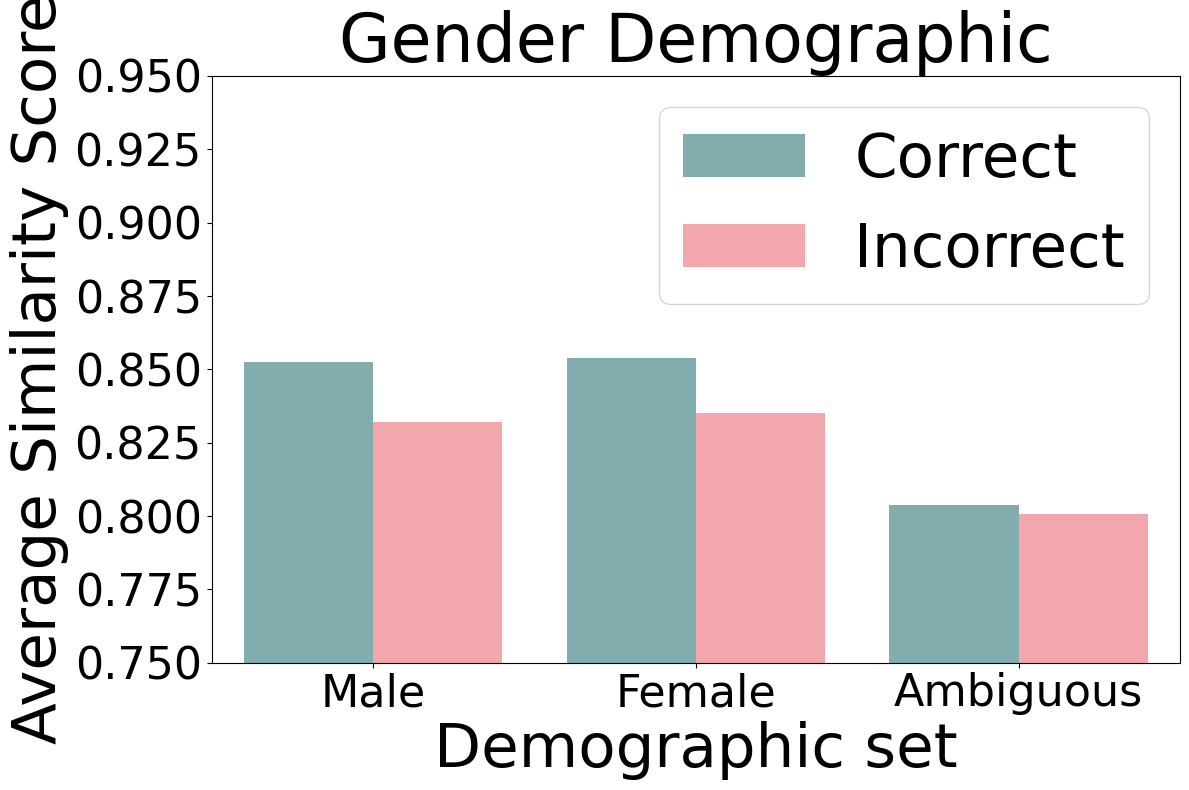

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to plot the average similarity scores
data_to_plot = {
    'Demographic': ['Male', 'Female', 'Ambiguous'] * 2,
    'Average Similarity Score': [avg_similarity_correct['Male'], avg_similarity_correct['Female'], avg_similarity_correct['Ambiguous'],
                                 avg_similarity_incorrect['Male'], avg_similarity_incorrect['Female'], avg_similarity_incorrect['Ambiguous']],
    'Classification': ['Correct'] * 3 + ['Incorrect'] * 3
}

plot_df = pd.DataFrame(data_to_plot)

# Create the plot using the reference image's scale and color scheme

# Set the color palette to match the reference image
colors = ["#79B4B7", "#FF9AA2"]

# Plot configuration
plt.figure(figsize=(12, 8))
plot = sns.barplot(x='Demographic', y='Average Similarity Score', hue='Classification', data=plot_df, palette=colors)

# Set the plot title and labels with appropriate font sizes
plot.set_title('Gender Demographic', fontsize=LARGE)
plot.set_xlabel('Demographic set', fontsize=MEDIUM)
plot.set_ylabel('Average Similarity Score', fontsize=MEDIUM)

# Set the limits for the Y-axis to match the reference image scale
plot.set(ylim=(0.75, 0.95))

# Configure the legend
plt.legend(fontsize=MEDIUM, title_fontsize=MEDIUM)

# Configure the tick sizes
plt.xticks(fontsize=SMALL)
plt.yticks(fontsize=SMALL)

# Tight layout for saving the figure properly
plt.tight_layout()

# Save the plot as a high-resolution PNG file to match the reference scale and color scheme
plt.savefig('semantic_corr_incorr_gen.png', dpi=300)

# Show the plot
plt.show()


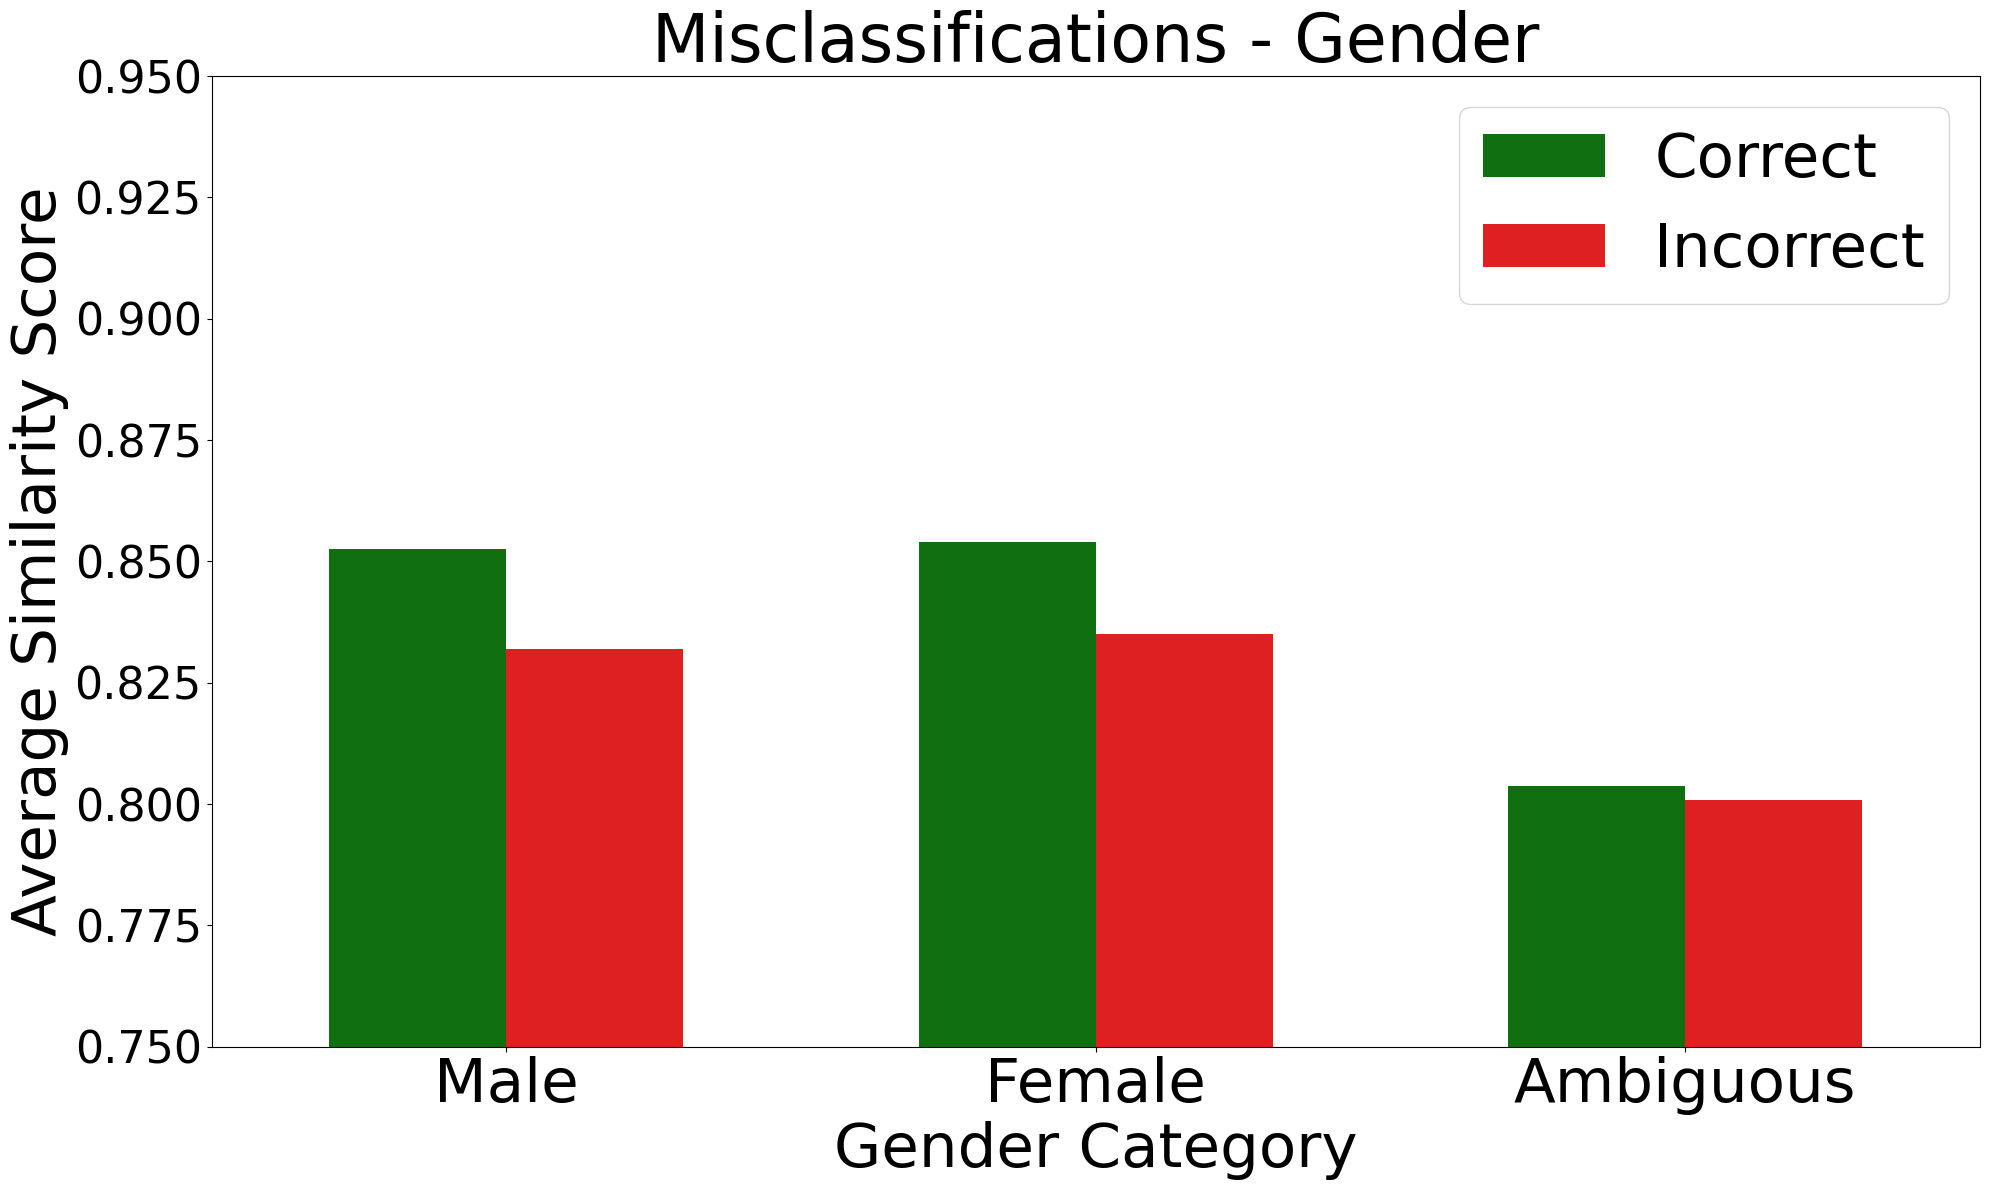

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to plot the average similarity scores
data_to_plot = {
    'Demographic': ['Male', 'Female', 'Ambiguous'] * 2,
    'Average Similarity Score': [avg_similarity_correct['Male'], avg_similarity_correct['Female'], avg_similarity_correct['Ambiguous'],
                                 avg_similarity_incorrect['Male'], avg_similarity_incorrect['Female'], avg_similarity_incorrect['Ambiguous']],
    'Classification': ['Correct'] * 3 + ['Incorrect'] * 3
}

plot_df = pd.DataFrame(data_to_plot)

# Create the plot using the reference image's scale and color scheme

# Set the color palette to match the reference image
colors = ["green", "red"]

bar_width = 0.6

# Plot configuration
plt.figure(figsize=(20, 12))
plot = sns.barplot(x='Demographic', y='Average Similarity Score', hue='Classification', data=plot_df, palette=colors, width=bar_width)

# Set the plot title and labels with appropriate font sizes
plot.set_title('Misclassifications - Gender', fontsize=LARGE)
plot.set_xlabel('Gender Category', fontsize=MEDIUM)
plot.set_ylabel('Average Similarity Score', fontsize=MEDIUM)

# Set the limits for the Y-axis to match the reference image scale
plot.set(ylim=(0.75, 0.95))

# Configure the legend
plt.legend(fontsize=MEDIUM, title_fontsize=MEDIUM)

# Configure the tick sizes
plt.xticks(fontsize=MEDIUM)
plt.yticks(fontsize=SMALL)


# Tight layout for saving the figure properly
plt.tight_layout()

# Save the plot as a high-resolution PNG file to match the reference scale and color scheme
# plt.savefig('semantic_corr_incorr_gen.png', dpi=300)

# Show the plot
plt.show()


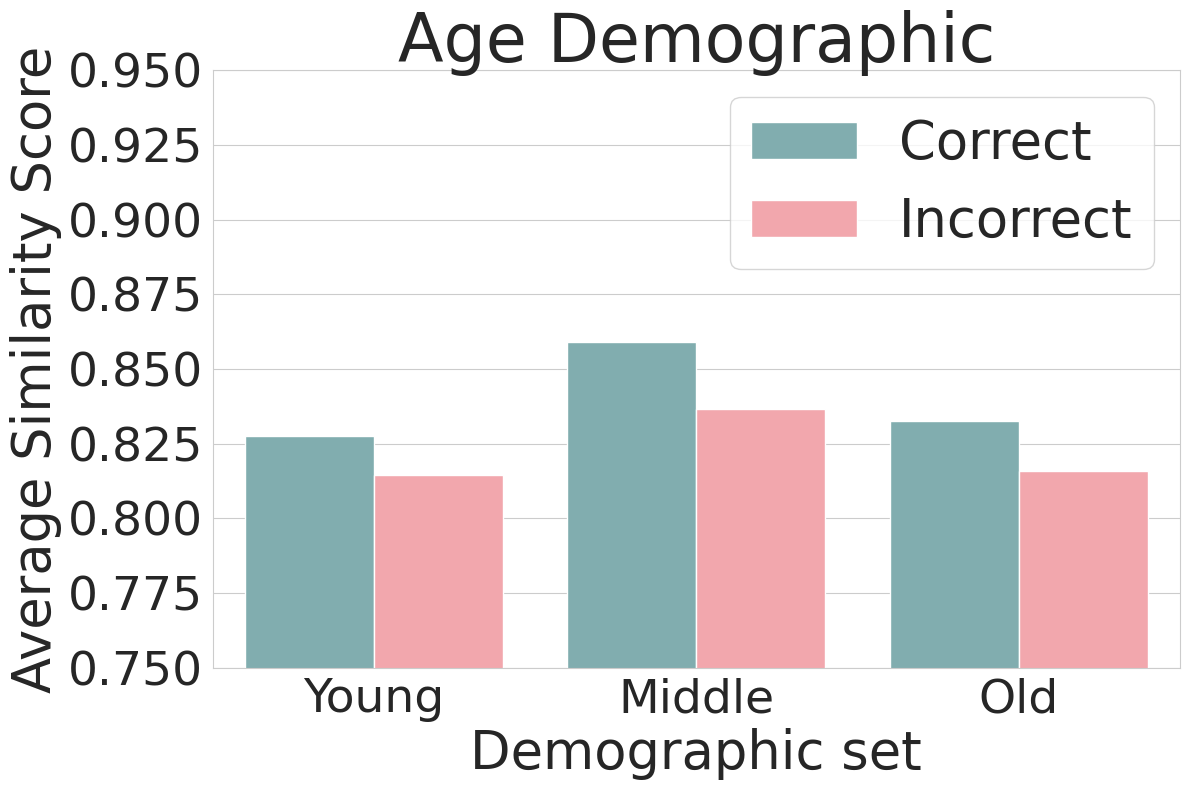

'semantic_corr_incorr_age.png'

In [12]:
# Filtering the dataframe for rows where 'choice_b' (baseline prediction) is equal to 'target' (ground truth)
correct_age_df = young_middle_old_df[young_middle_old_df['choice_b'] == young_middle_old_df['target']]

# Now, we need to split the dataset into correctly and incorrectly classified paraphrases based on age
# For young, middle, and old, we have 'choice_y', 'choice_m', and 'choice_o' columns for predictions

# Correctly classified paraphrases for young, middle, and old
correct_young_df = correct_age_df[correct_age_df['choice_y'] == correct_age_df['target']]
correct_middle_df = correct_age_df[correct_age_df['choice_m'] == correct_age_df['target']]
correct_old_df = correct_age_df[correct_age_df['choice_o'] == correct_age_df['target']]

# Incorrectly classified paraphrases for young, middle, and old
incorrect_young_df = correct_age_df[correct_age_df['choice_y'] != correct_age_df['target']]
incorrect_middle_df = correct_age_df[correct_age_df['choice_m'] != correct_age_df['target']]
incorrect_old_df = correct_age_df[correct_age_df['choice_o'] != correct_age_df['target']]

# Calculate average similarity scores for correctly and incorrectly classified paraphrases
avg_similarity_correct_age = {
    'Young': correct_young_df['sim_Young'].mean(),
    'Middle': correct_middle_df['sim_Middle'].mean(),
    'Old': correct_old_df['sim_Old'].mean()
}

avg_similarity_incorrect_age = {
    'Young': incorrect_young_df['sim_Young'].mean(),
    'Middle': incorrect_middle_df['sim_Middle'].mean(),
    'Old': incorrect_old_df['sim_Old'].mean()
}

# Create a DataFrame for plotting the average similarity scores
data_to_plot_age = {
    'Demographic': ['Young', 'Middle', 'Old'] * 2,
    'Average Similarity Score': [avg_similarity_correct_age['Young'], avg_similarity_correct_age['Middle'], avg_similarity_correct_age['Old'],
                                 avg_similarity_incorrect_age['Young'], avg_similarity_incorrect_age['Middle'], avg_similarity_incorrect_age['Old']],
    'Classification': ['Correct'] * 3 + ['Incorrect'] * 3
}

plot_df_age = pd.DataFrame(data_to_plot_age)

# Plot the data using seaborn with the same style as the reference image
sns.set_style("whitegrid")

# Create the plot for age demographics
plt.figure(figsize=(12, 8))
plot_age = sns.barplot(x='Demographic', y='Average Similarity Score', hue='Classification', data=plot_df_age, palette=colors)

# Set the title and labels of the plot
plot_age.set_title('Age Demographic', fontsize=LARGE)
plot_age.set_xlabel('Demographic set', fontsize=MEDIUM)
plot_age.set_ylabel('Average Similarity Score', fontsize=MEDIUM)

# Set the Y-axis limit to match the reference image
plot_age.set(ylim=(0.75, 0.95))

# Adjust the legend
plt.legend(fontsize=MEDIUM, title_fontsize=MEDIUM)

# Adjust tick size for readability
plt.xticks(fontsize=SMALL)
plt.yticks(fontsize=SMALL)

# Save the plot as a high-resolution PNG file
plt.tight_layout()
age_plot_path = 'semantic_corr_incorr_age.png'
plt.savefig(age_plot_path, dpi=300)

# Show the plot
plt.show()

age_plot_path


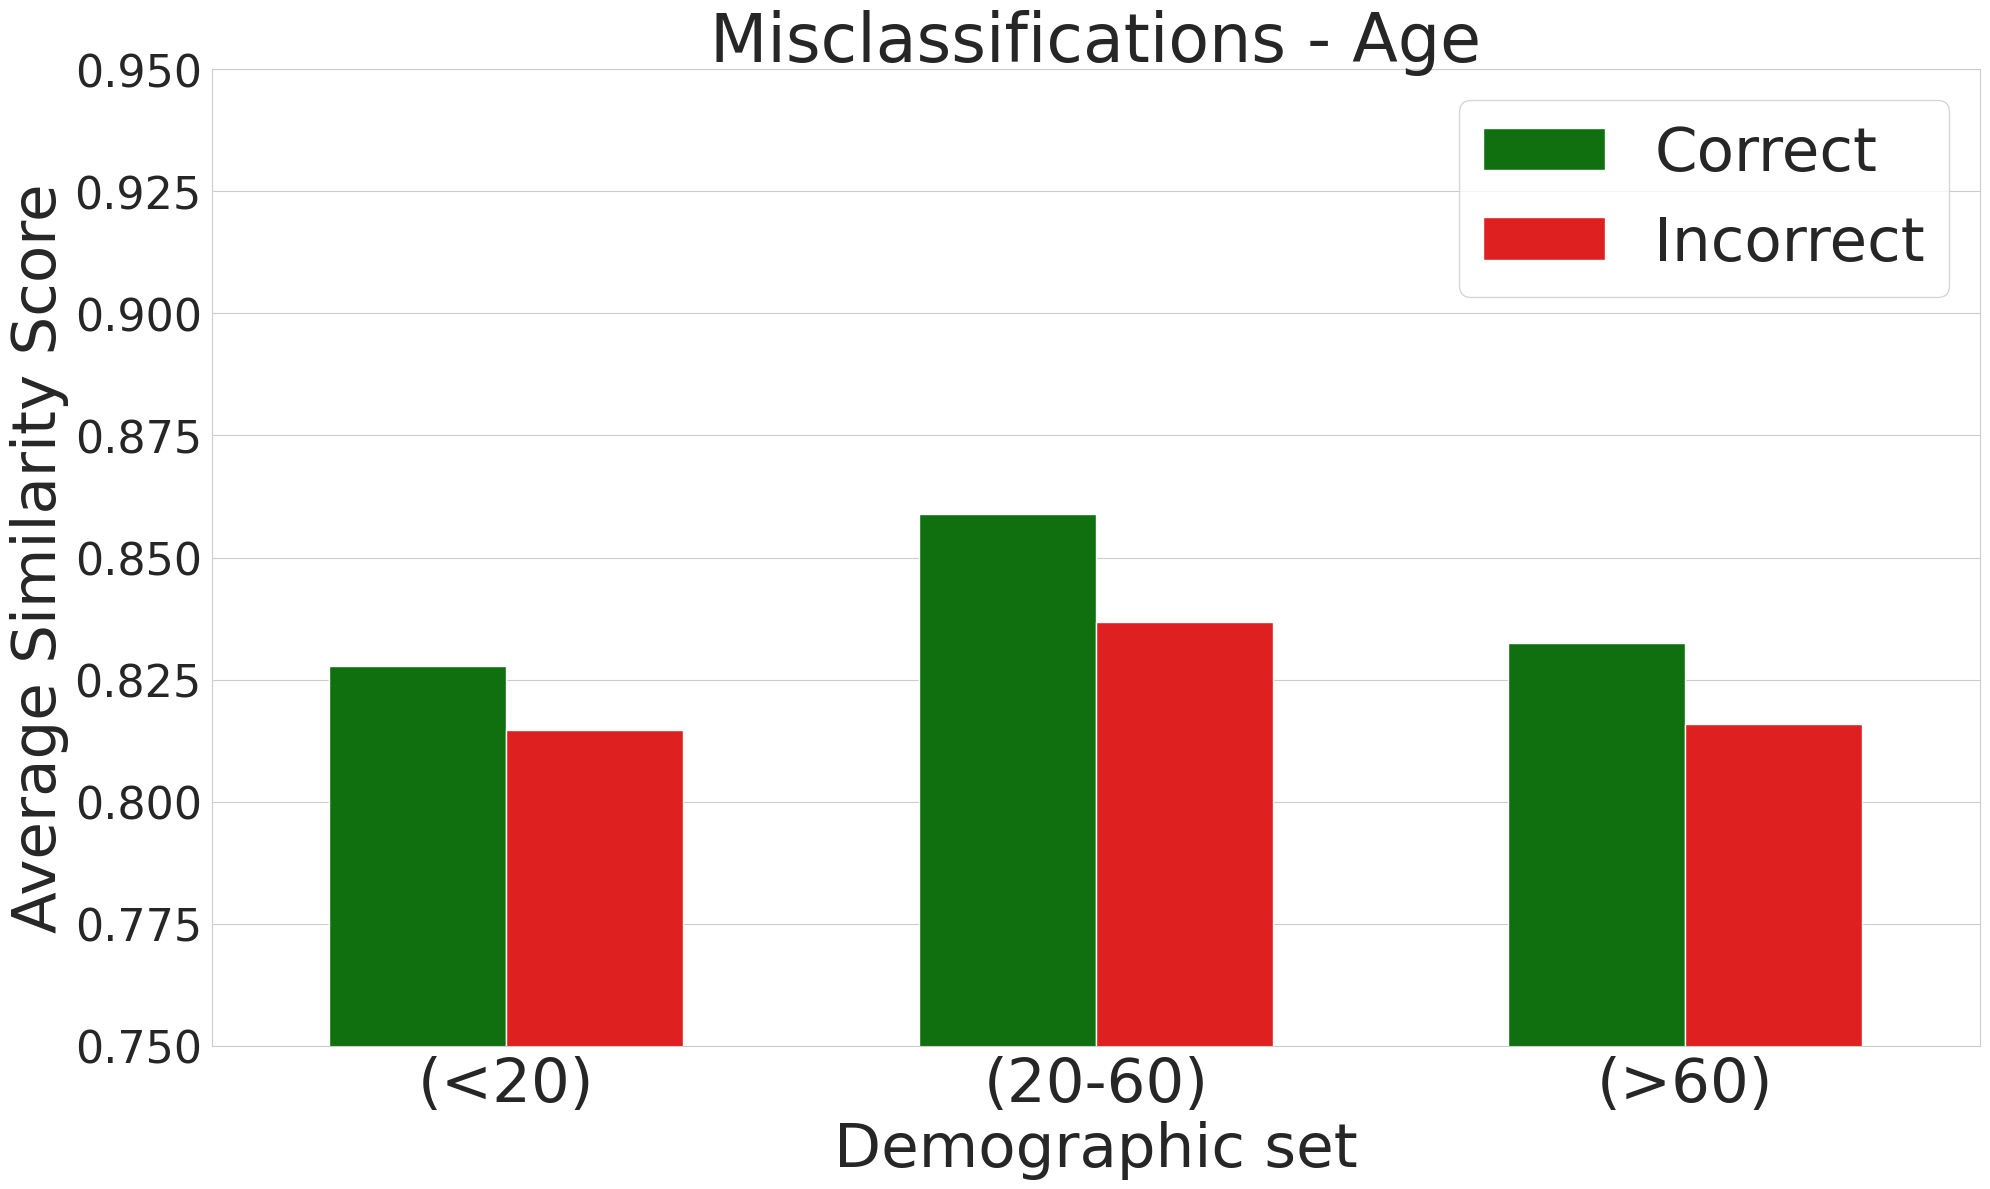

'semantic_corr_incorr_age.png'

In [7]:
# Filtering the dataframe for rows where 'choice_b' (baseline prediction) is equal to 'target' (ground truth)
correct_age_df = young_middle_old_df[young_middle_old_df['choice_b'] == young_middle_old_df['target']]

# Now, we need to split the dataset into correctly and incorrectly classified paraphrases based on age
# For young, middle, and old, we have 'choice_y', 'choice_m', and 'choice_o' columns for predictions

# Correctly classified paraphrases for young, middle, and old
correct_young_df = correct_age_df[correct_age_df['choice_y'] == correct_age_df['target']]
correct_middle_df = correct_age_df[correct_age_df['choice_m'] == correct_age_df['target']]
correct_old_df = correct_age_df[correct_age_df['choice_o'] == correct_age_df['target']]

# Incorrectly classified paraphrases for young, middle, and old
incorrect_young_df = correct_age_df[correct_age_df['choice_y'] != correct_age_df['target']]
incorrect_middle_df = correct_age_df[correct_age_df['choice_m'] != correct_age_df['target']]
incorrect_old_df = correct_age_df[correct_age_df['choice_o'] != correct_age_df['target']]

# Calculate average similarity scores for correctly and incorrectly classified paraphrases
avg_similarity_correct_age = {
    'Young': correct_young_df['sim_Young'].mean(),
    'Middle': correct_middle_df['sim_Middle'].mean(),
    'Old': correct_old_df['sim_Old'].mean()
}

avg_similarity_incorrect_age = {
    'Young': incorrect_young_df['sim_Young'].mean(),
    'Middle': incorrect_middle_df['sim_Middle'].mean(),
    'Old': incorrect_old_df['sim_Old'].mean()
}

# Create a DataFrame for plotting the average similarity scores
data_to_plot_age = {
    'Demographic': ['(<20)', '(20-60)', '(>60)'] * 2,
    'Average Similarity Score': [avg_similarity_correct_age['Young'], avg_similarity_correct_age['Middle'], avg_similarity_correct_age['Old'],
                                 avg_similarity_incorrect_age['Young'], avg_similarity_incorrect_age['Middle'], avg_similarity_incorrect_age['Old']],
    'Classification': ['Correct'] * 3 + ['Incorrect'] * 3
}

plot_df_age = pd.DataFrame(data_to_plot_age)

# Plot the data using seaborn with the same style as the reference image
sns.set_style("whitegrid")

# Create the plot for age demographics
plt.figure(figsize=(20, 12))
plot_age = sns.barplot(x='Demographic', y='Average Similarity Score', hue='Classification', data=data_to_plot_age, palette=colors, width=bar_width)

# Set the title and labels of the plot
plot_age.set_title('Misclassifications - Age', fontsize=LARGE)
plot_age.set_xlabel('Demographic set', fontsize=MEDIUM)
plot_age.set_ylabel('Average Similarity Score', fontsize=MEDIUM)

# Set the Y-axis limit to match the reference image
plot_age.set(ylim=(0.75, 0.95))

# Adjust the legend
plt.legend(fontsize=MEDIUM, title_fontsize=MEDIUM)

# Adjust tick size for readability
plt.xticks(fontsize=MEDIUM)
plt.yticks(fontsize=SMALL)

# Save the plot as a high-resolution PNG file
plt.tight_layout()
age_plot_path = 'semantic_corr_incorr_age.png'
# plt.savefig(age_plot_path, dpi=300)

# Show the plot
plt.show()

age_plot_path
